In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast

from constants import numeric_columns as num_cols
from constants import *

#skewness
import scipy
from scipy.stats import skew

#MINMAX
from sklearn.preprocessing import MinMaxScaler

In [130]:
#importo df preprocessed
df_pp = pd.read_csv("pp_train.csv")


### Conto valori zero nel dataset

In [131]:
zero_counts = df_pp.apply(lambda col: (col == 0).sum())

print(zero_counts)

#awardWins sarebbero stati 11971 ma li abbiamo aggiunti

originalTitle                      0
rating                             0
startYear                          0
endYear                            0
runtimeMinutes                     1
awardWins                      14589
numVotes                           0
worstRating                        0
bestRating                         0
totalImages                     3290
totalVideos                    14821
totalCredits                     117
criticReviewsTotal             11439
titleType                          0
awardNominationsExcludeWins    14427
canHaveEpisodes                14832
isRatable                          0
isAdult                        16005
numRegions                         0
userReviewsTotal                9229
ratingCount                        0
countryOfOrigin                    0
is_Thriller                    15646
is_Family                      15205
is_Short                       13967
is_Sport                       16202
is_Biography                   16154
i

In [132]:
percentuale_zeri = df_pp.apply(lambda col: (col == 0).sum() / len(col) * 100)

print(percentuale_zeri)

originalTitle                   0.000000
rating                          0.000000
startYear                       0.000000
endYear                         0.000000
runtimeMinutes                  0.006086
awardWins                      88.789483
numVotes                        0.000000
worstRating                     0.000000
bestRating                      0.000000
totalImages                    20.023127
totalVideos                    90.201448
totalCredits                    0.712069
criticReviewsTotal             69.618404
titleType                       0.000000
awardNominationsExcludeWins    87.803542
canHaveEpisodes                90.268395
isRatable                       0.000000
isAdult                        97.407340
numRegions                      0.000000
userReviewsTotal               56.168219
ratingCount                     0.000000
countryOfOrigin                 0.000000
is_Thriller                    95.222445
is_Family                      92.538494
is_Short        

### Visualizzazione della distribuzione originale delle variabili numeriche

In [133]:
#df_pp.columns

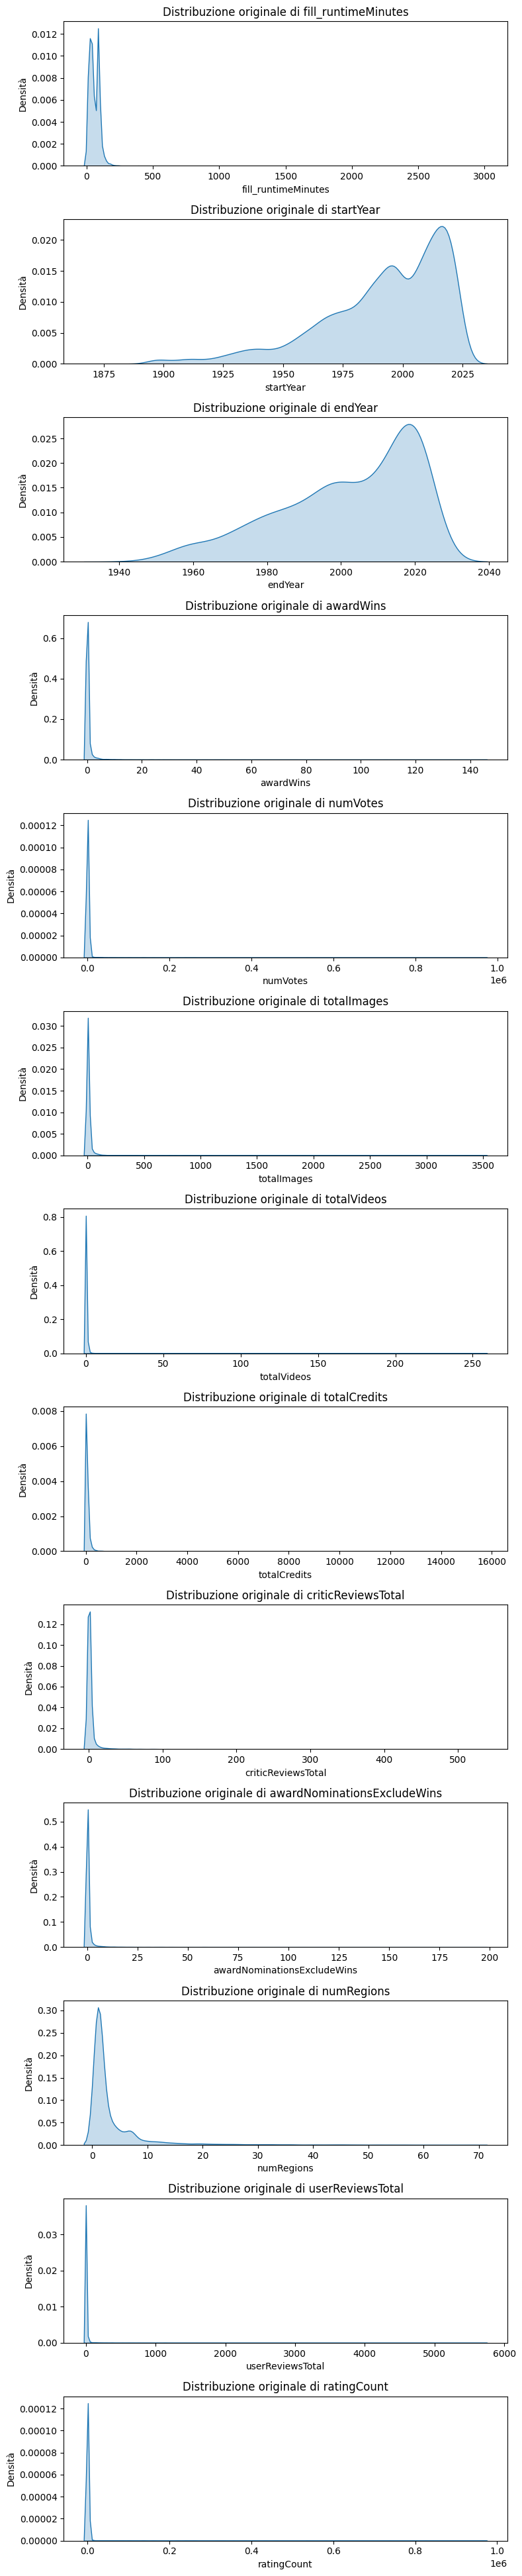

In [134]:
# variabili numeriche Dataset di input
df_pp_num = df_pp[['fill_runtimeMinutes','startYear', 'endYear', 'awardWins', 'numVotes', 'totalImages',
                 'totalVideos', 'totalCredits', 'criticReviewsTotal', 'awardNominationsExcludeWins', 
                 'numRegions', 'userReviewsTotal', 'ratingCount']]

# 1. Visualizzare la distribuzione originale
fig, axes = plt.subplots(nrows=len(df_pp_num.columns), ncols=1, figsize=(8, len(df_pp_num.columns) * 3))

for col, ax in zip(df_pp_num.columns, axes):
    sns.kdeplot(data=df_pp_num, x=col, ax=ax, fill=True)
    ax.set_title(f'Distribuzione originale di {col}')
    ax.set_ylabel('Densità')

plt.tight_layout()
plt.show()

## Trasformazione log

In [135]:
#calcolare la skewness -> considerando anche i valori nulli -> calcola quella totale

new_skewness = df_pp_num.apply(lambda col: skew(col, nan_policy='omit') if col.dtypes != 'object' else None)

print(new_skewness)

fill_runtimeMinutes            17.683161
startYear                      -1.137049
endYear                        -0.747391
awardWins                      22.721546
numVotes                       28.518758
totalImages                    28.750900
totalVideos                    48.269849
totalCredits                   50.448594
criticReviewsTotal             14.776187
awardNominationsExcludeWins    22.067634
numRegions                      4.181723
userReviewsTotal               46.308058
ratingCount                    28.518375
dtype: float64


In [136]:
#Applicare il logaritmo a tutte le colonne con alta skewness (>10) + numRegions, vediamo se toglierla

columns_to_transform = ['fill_runtimeMinutes', 'awardWins', 'numVotes', 'totalImages',
                 'totalVideos', 'totalCredits', 'criticReviewsTotal', 'awardNominationsExcludeWins', 
                 'numRegions', 'userReviewsTotal', 'ratingCount']
            
df_pp_transformed = df_pp.copy()
df_pp_transformed[columns_to_transform] = df_pp[columns_to_transform].apply(lambda col: np.log1p(col))

In [137]:
# Ricalcolare la skewness 

df_pp_transformed_num = df_pp_transformed[['fill_runtimeMinutes','startYear', 'endYear', 'awardWins', 'numVotes', 'totalImages',
                 'totalVideos', 'totalCredits', 'criticReviewsTotal', 'awardNominationsExcludeWins', 
                 'numRegions', 'userReviewsTotal', 'ratingCount']]


new_skewness = df_pp_transformed_num.apply(lambda col: skew(col, nan_policy='omit') if col.dtypes != 'object' else None)

print(new_skewness)

fill_runtimeMinutes           -0.958784
startYear                     -1.137049
endYear                       -0.747391
awardWins                      4.126072
numVotes                       1.302544
totalImages                    1.285189
totalVideos                    5.465202
totalCredits                  -0.200615
criticReviewsTotal             2.453163
awardNominationsExcludeWins    4.016022
numRegions                     1.574707
userReviewsTotal               2.052703
ratingCount                    1.302397
dtype: float64


### visualizzazione distribuzione post trasformazione lOgaritmica

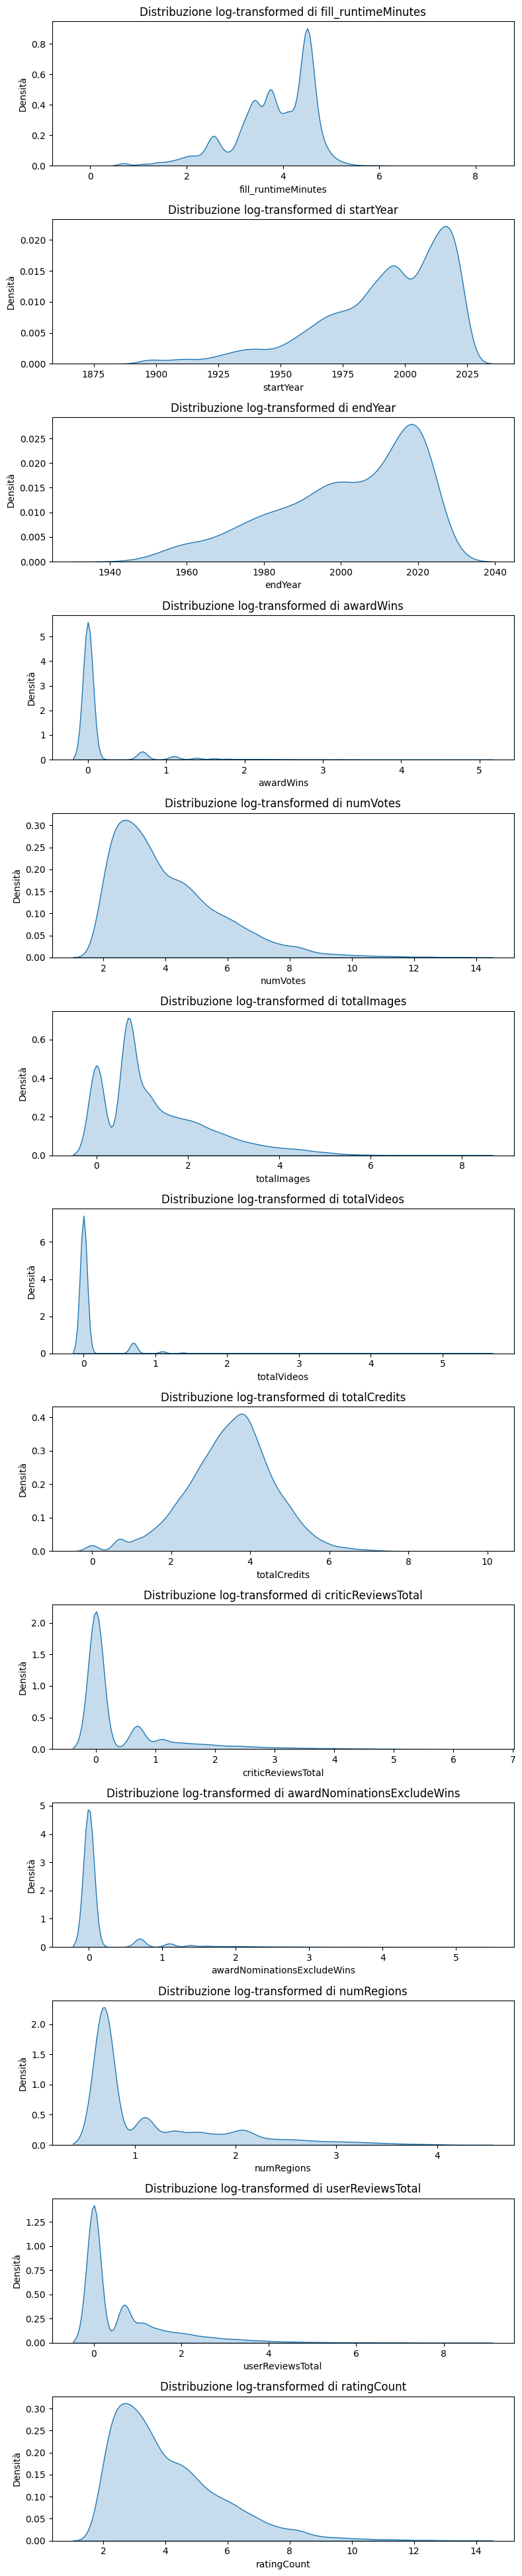

In [138]:

fig, axes = plt.subplots(nrows=len(df_pp_transformed_num.columns), ncols=1, figsize=(8, len(df_pp_transformed_num.columns) * 3))

for col, ax in zip(df_pp_transformed_num.columns, axes):
    sns.kdeplot(data=df_pp_transformed_num, x=col, ax=ax, fill=True)
    ax.set_title(f'Distribuzione log-transformed di {col}')
    ax.set_ylabel('Densità')

plt.tight_layout()
plt.show()

## prova di Square root tranformation

In [139]:
# List of variables to apply square root transformation
variables_to_transform_sqrt = [
    'fill_runtimeMinutes', 'awardWins', 'numVotes', 'totalImages',
    'totalVideos', 'totalCredits', 'criticReviewsTotal', 'awardNominationsExcludeWins', 
    'numRegions', 'userReviewsTotal', 'ratingCount'
]

# Apply square root transformation to each variable
def apply_sqrt_transformation(df, variables):
    df_transformed_sqrt = df.copy()
    for var in variables:
        if var in df_transformed_sqrt.columns:
            # Ensure no negative values before applying square root
            df_transformed_sqrt[var] = np.sqrt(np.maximum(df_transformed_sqrt[var], 0))
        else:
            print(f"Warning: Variable '{var}' not found in the DataFrame.")
    return df_transformed_sqrt

# Assuming df_pp is your DataFrame
df_pp_transformed_sqrt = apply_sqrt_transformation(df_pp, variables_to_transform_sqrt)

### skewness e visualizzazione post trasformazione square root

In [140]:
# variabili numeriche di df_transformed
df_pp_transformed_sqrt_num = df_pp_transformed_sqrt[['fill_runtimeMinutes','startYear', 'endYear', 'awardWins', 'numVotes', 'totalImages',
                 'totalVideos', 'totalCredits', 'criticReviewsTotal', 'awardNominationsExcludeWins', 
                 'numRegions', 'userReviewsTotal', 'ratingCount']]

# Ricalcolare la skewness -> questa volta considera anche i valori nulli -> calcola quella totale
new_skewness = df_pp_transformed_sqrt_num .apply(lambda col: skew(col, nan_policy='omit') if col.dtypes != 'object' else None)

print(new_skewness)

fill_runtimeMinutes             0.529127
startYear                      -1.137049
endYear                        -0.747391
awardWins                       5.238303
numVotes                       12.531886
totalImages                     6.170349
totalVideos                     8.447103
totalCredits                    4.075632
criticReviewsTotal              4.618850
awardNominationsExcludeWins     5.626732
numRegions                      2.345142
userReviewsTotal                7.438775
ratingCount                    12.530614
dtype: float64


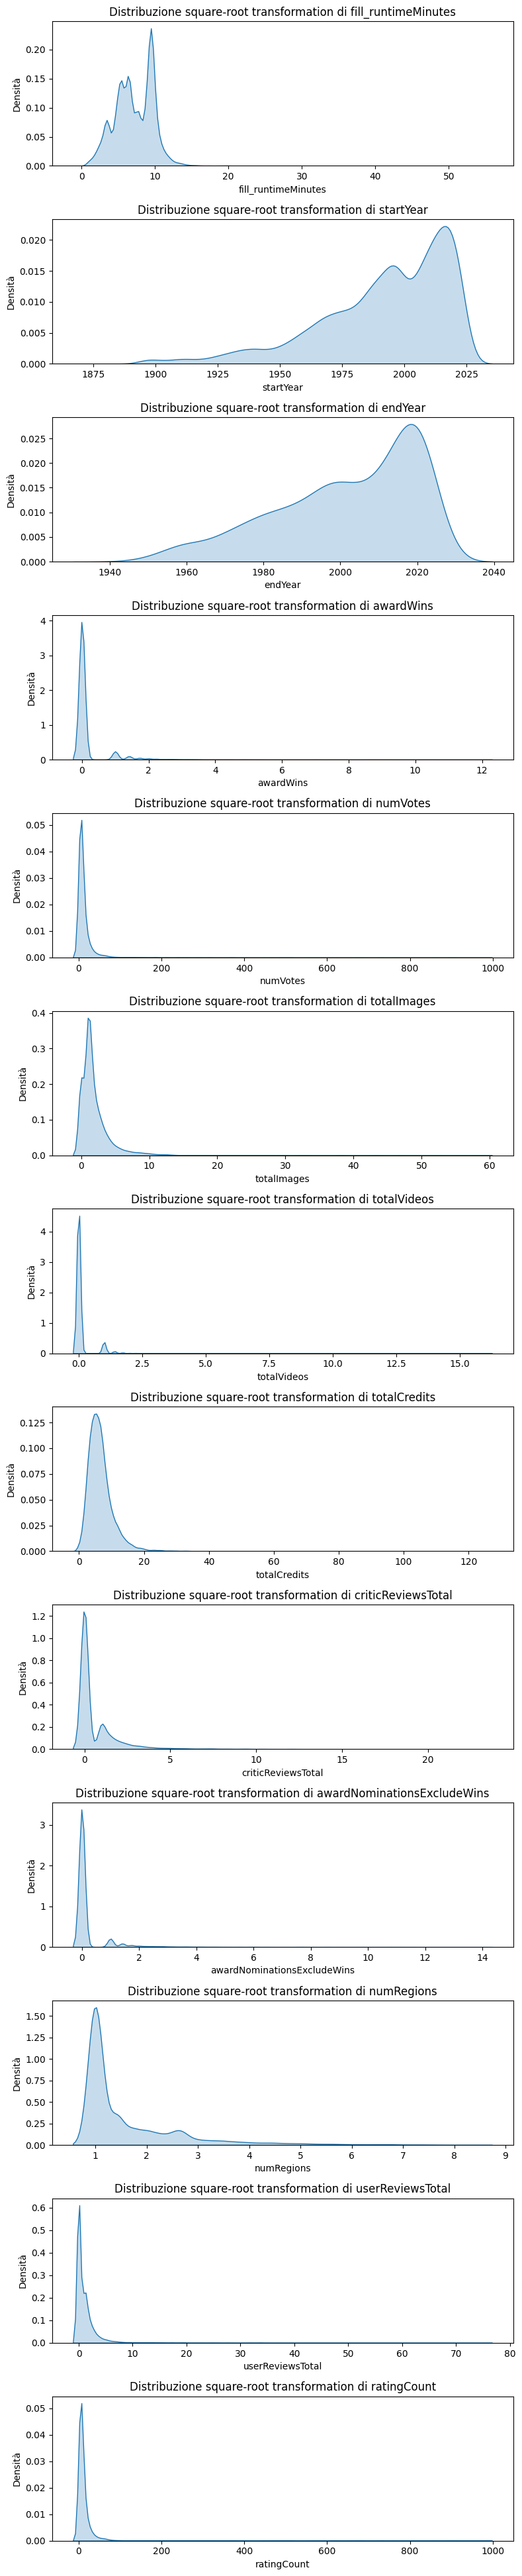

In [141]:

fig, axes = plt.subplots(nrows=len(df_pp_transformed_sqrt_num.columns), ncols=1, figsize=(8, len(df_pp_transformed_sqrt_num.columns) * 3))

for col, ax in zip(df_pp_transformed_sqrt_num.columns, axes):
    sns.kdeplot(data=df_pp_transformed_sqrt_num, x=col, ax=ax, fill=True)
    ax.set_title(f'Distribuzione square-root transformation di {col}')
    ax.set_ylabel('Densità')

plt.tight_layout()
#plt.show()